In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
#centers=[[-1,-1],[-1,-1]]
X, _ = make_blobs(n_samples=10000, centers=3, random_state=42, cluster_std=0.60)

number of estimated clusters : 3


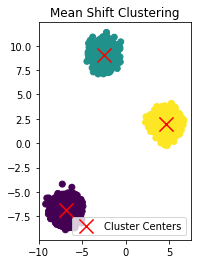

In [9]:
bandwidth=1.5
clustering = MeanShift(bandwidth=bandwidth,bin_seeding=True)
clustering.fit(X)
labels=clustering.labels_
cluster_centers = clustering.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)
plt.figure(1)
plt.clf()
colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot()
    cluster_center[0],
    cluster_center[1],
    markers[k],
    markerfacecolor=col,
    markeredgecolor="k",
    markersize=14,
plt.subplot(1, 2, 1)
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis', marker='o')
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')
plt.title('Mean Shift Clustering')
plt.legend()
plt.show()

In [10]:
supervised=dataset

In [11]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
supervised['Cluster_group']=clustering

In [13]:
supervised.to_csv("cluster.csv",index=False)

In [15]:
dir(clustering)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'bandwidth',
 'bin_seeding',
 'cluster_all',
 'cluster_centers_',
 'fit',
 'fit_predict',
 'get_params',
 'labels_',
 'max_iter',
 'min_bin_freq',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'predict',
 'seeds',
 'set_params']

In [16]:
centroids=clustering.cluster_centers_

In [17]:
centroids

array([[-6.8634295 , -6.86052301],
       [-2.51553976,  9.01011056],
       [ 4.63869716,  1.97169336]])

In [24]:
clustering.labels_

array([1, 2, 1, ..., 2, 1, 1], dtype=int64)

In [25]:
supervised.columns[3]

'Annual Income (k$)'

In [26]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

In [27]:
#!pip install seaborn

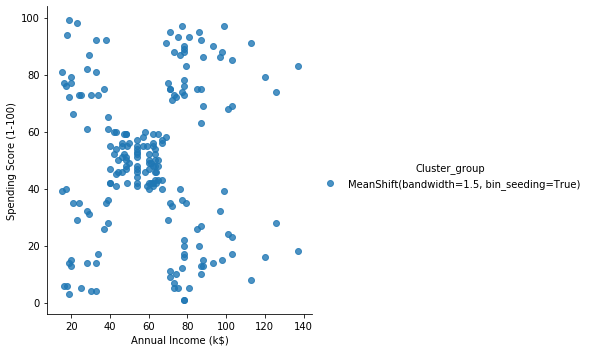

In [28]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True, )

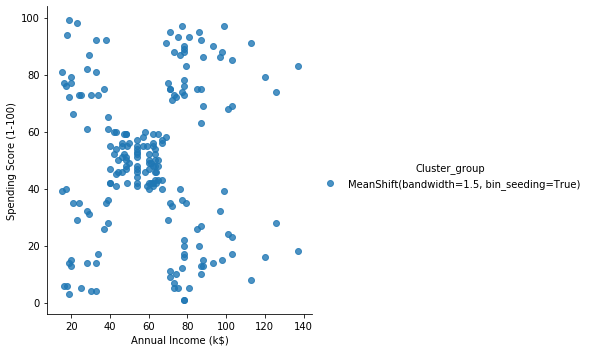

In [29]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False,legend_out=True)

In [174]:
!pip install seaborn